In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


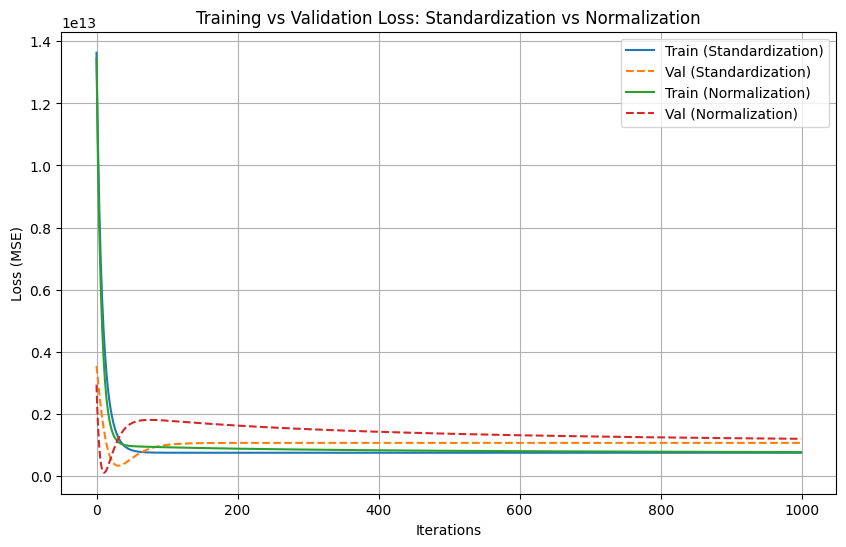

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Courses/ML/Housing.csv"
data = pd.read_csv(file_path)

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X_raw = data[features].values
Y = data[target].values
m = len(Y)

def add_bias(X):
    """Add intercept term"""
    return np.hstack((np.ones((X.shape[0], 1)), X))

def standardize(X):
    """Mean=0, std=1"""
    return (X - X.mean(axis=0)) / X.std(axis=0)

def normalize(X):
    """Min-max scaling to [0,1]"""
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Cost and Gradient Descent

def compute_cost(X, Y, theta):
    m = len(Y)
    errors = X.dot(theta) - Y
    return (1 / (2*m)) * np.sum(errors**2)

def gradient_descent(X, Y, X_val, Y_val, theta, lr=0.05, iterations=1000):
    train_costs, val_costs = [], []

    for _ in range(iterations):
        errors = X.dot(theta) - Y
        gradients = (1/len(Y)) * X.T.dot(errors)
        theta -= lr * gradients

        train_costs.append(compute_cost(X, Y, theta))
        val_costs.append(compute_cost(X_val, Y_val, theta))

    return theta, train_costs, val_costs

# Train models with Standardization and Normalization

train_size = int(0.8 * m)

# Standardization
X_std = add_bias(standardize(X_raw))
X_train_std, X_val_std = X_std[:train_size], X_std[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

theta_init = np.zeros(X_std.shape[1])
theta_std, train_std, val_std = gradient_descent(X_train_std, Y_train, X_val_std, Y_val, theta_init, lr=0.05, iterations=1000)

# Normalization
X_norm = add_bias(normalize(X_raw))
X_train_norm, X_val_norm = X_norm[:train_size], X_norm[train_size:]

theta_init = np.zeros(X_norm.shape[1])
theta_norm, train_norm, val_norm = gradient_descent(X_train_norm, Y_train, X_val_norm, Y_val, theta_init, lr=0.05, iterations=1000)

plt.figure(figsize=(10,6))
plt.plot(train_std, label="Train (Standardization)")
plt.plot(val_std, '--', label="Val (Standardization)")
plt.plot(train_norm, label="Train (Normalization)")
plt.plot(val_norm, '--', label="Val (Normalization)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss: Standardization vs Normalization")
plt.legend()
plt.grid(True)
plt.show()


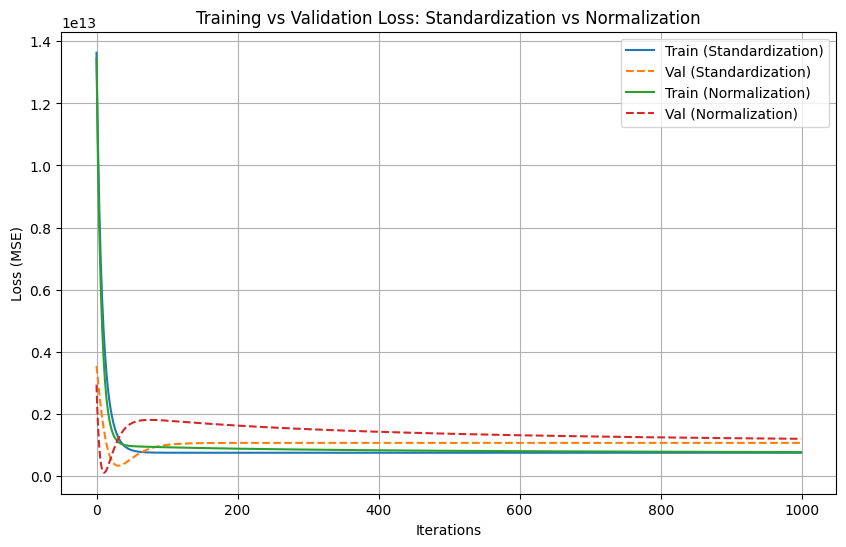

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Courses/ML/Housing.csv"
data = pd.read_csv(file_path)

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X_raw = data[features].values
Y = data[target].values
m = len(Y)

def add_bias(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

def normalize(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    errors = predictions - Y
    return (1 / (2 * m)) * np.sum(errors ** 2)

def gradient_descent(X, Y, X_val, Y_val, theta, lr=0.05, iterations=1000):
    train_costs, val_costs = [], []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - Y
        gradients = (1 / len(Y)) * X.T.dot(errors)
        theta -= lr * gradients

        train_costs.append(compute_cost(X, Y, theta))
        val_costs.append(compute_cost(X_val, Y_val, theta))

    return theta, train_costs, val_costs


# Train with Standardization and Normalization

train_size = int(0.8 * m)

# Standardization
X_std = add_bias(standardize(X_raw))
X_train_std, X_val_std = X_std[:train_size], X_std[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

theta_init = np.zeros(X_std.shape[1])
theta_std, train_std, val_std = gradient_descent(X_train_std, Y_train, X_val_std, Y_val, theta_init, lr=0.05, iterations=1000)

# Normalization
X_norm = add_bias(normalize(X_raw))
X_train_norm, X_val_norm = X_norm[:train_size], X_norm[train_size:]

theta_init = np.zeros(X_norm.shape[1])
theta_norm, train_norm, val_norm = gradient_descent(X_train_norm, Y_train, X_val_norm, Y_val, theta_init, lr=0.05, iterations=1000)

plt.figure(figsize=(10,6))
plt.plot(train_std, label="Train (Standardization)")
plt.plot(val_std, '--', label="Val (Standardization)")
plt.plot(train_norm, label="Train (Normalization)")
plt.plot(val_norm, '--', label="Val (Normalization)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss: Standardization vs Normalization")
plt.legend()
plt.grid(True)
plt.show()
